In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [4]:
#read the data from movies on streaming platforms

stream_movies = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")

#convert rotten tomatoesstr to float
stream_movies['Rotten Tomatoes'] = stream_movies['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0

In [5]:
stream_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   float64
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(3

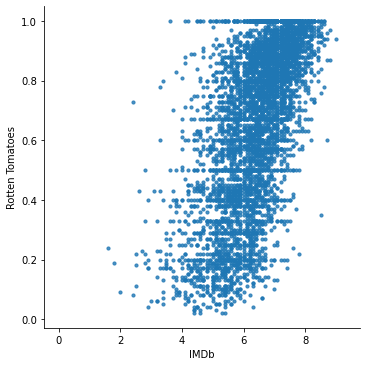

In [6]:
#scatter plot for imdb and rotten tomatoes rating in general

g = sns.lmplot(x="IMDb", y="Rotten Tomatoes", data=stream_movies,scatter_kws={"s": 10},fit_reg=False)


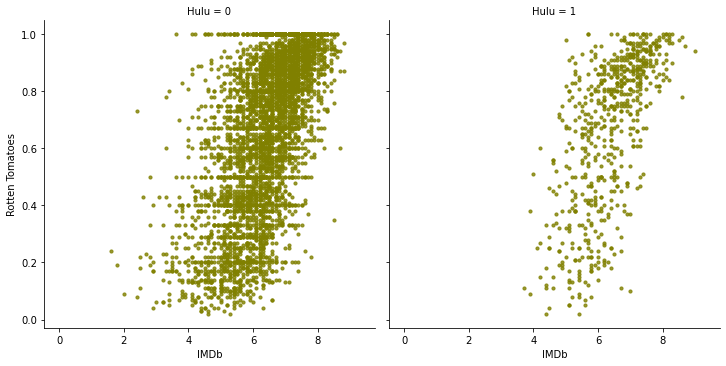

In [7]:
#scatter plot for imdb and rotten tomatoes rating on hulu

sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Hulu',data=stream_movies,
           scatter_kws={"color":"olive","s": 10},fit_reg=False)

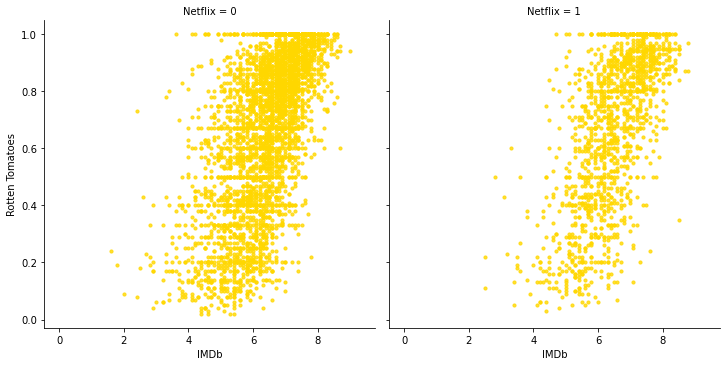

In [8]:
#scatter plot for imdb and rotten tomatoes rating on netflix
sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Netflix',data=stream_movies,scatter_kws={"color":"gold","s": 10},fit_reg=False)

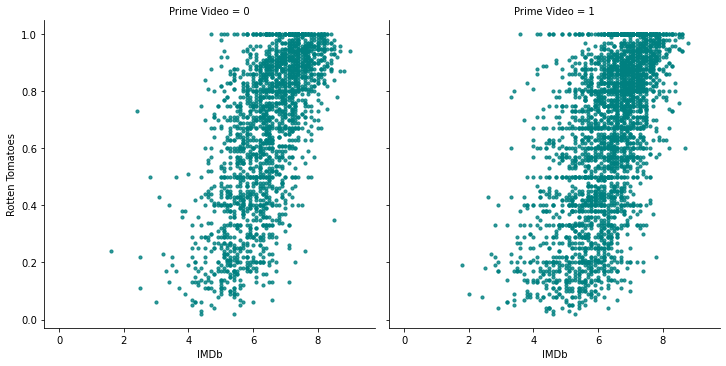

In [9]:
#scatter plot for imdb and rotten tomatoes rating on Prime Video

sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Prime Video',data=stream_movies,scatter_kws={"color":"teal","s": 10},fit_reg=False)

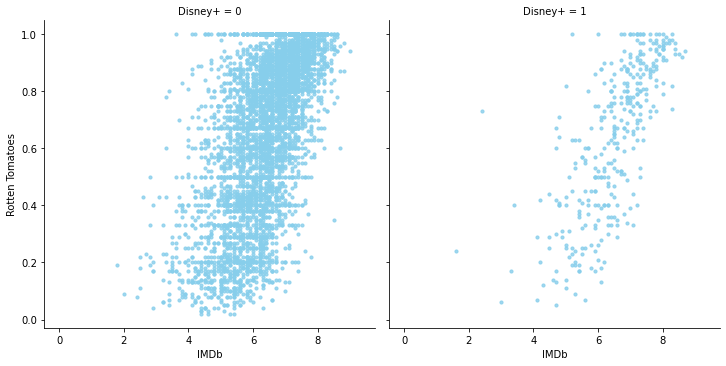

In [10]:
#scatter plot for imdb and rotten tomatoes rating on disney+

sns.lmplot(x="IMDb", y="Rotten Tomatoes", col='Disney+',data=stream_movies,scatter_kws={"color":"skyblue","s": 10},fit_reg=False)

In [11]:
#get the count of movies based on age for each platform

data_disney = stream_movies[stream_movies['Disney+']==1]
disney_age_count = np.array(data_disney['Age'].value_counts().sort_index())

data_Hulu = stream_movies[stream_movies['Hulu']==1]
Hulu_age_count = np.array(data_Hulu['Age'].value_counts().sort_index())

data_prime = stream_movies[stream_movies['Prime Video']==1]
prime_age_count = np.array(data_prime['Age'].value_counts().sort_index())


data_net = stream_movies[stream_movies['Netflix']==1]
net_age_count = np.array(data_net['Age'].value_counts().sort_index())

NameError: name 'r' is not defined

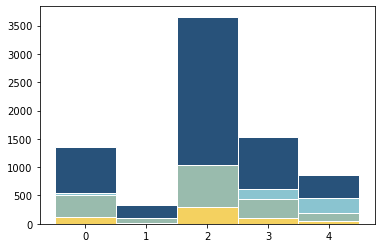

In [12]:
#stacked boxplot for age based on platform

from matplotlib import rc

# The position of the bars on the x-axis
pos = np.arange(5)

# Names of group and bar width
names = ['13+','16+','18+','7+','all']
barWidth = 1

#prime
plt.bar(pos, np.add(np.add(np.add(net_age_count,Hulu_age_count),disney_age_count), prime_age_count),
      color='#28527a', edgecolor='white', width=barWidth)

# disney
plt.bar(pos, np.add(np.add(net_age_count,Hulu_age_count),disney_age_count), 
       color='#8ac4d0', edgecolor='white', width=barWidth)

# netflix
plt.bar(pos, np.add(net_age_count,Hulu_age_count), color='#99bbad', edgecolor='white', width=barWidth)

# Hulu
plt.bar(pos, Hulu_age_count, color='#f4d160', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
#legend
colors = {'Hulu':'#f4d160', 'Netflix':'#99bbad','Disney+':'#8ac4d0','Prime Video':'#28527a'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title("Amount of content per age group of each platform", size = 10)
# Show graphic
plt.show()

In [ ]:
plt.figure(figsize = (8, 8))
sns.regplot(y = stream_movies['Rotten Tomatoes'],x = stream_movies['IMDb'],x_bins=10,marker="+")
plt.show()

In [ ]:
# Rating vs Year

stream_movies.groupby("Year")["IMDb"].mean().plot(figsize = (15,6))
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average rating trend over the course of time", size = 15)

In [ ]:
#IMDB and rotten tomatoes rating based in general

sns.distplot( stream_movies['IMDb'])

In [ ]:
sns.distplot( stream_movies['Rotten Tomatoes'],color="red")

C:\Users\CLICK-USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CLICK-USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CLICK-USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

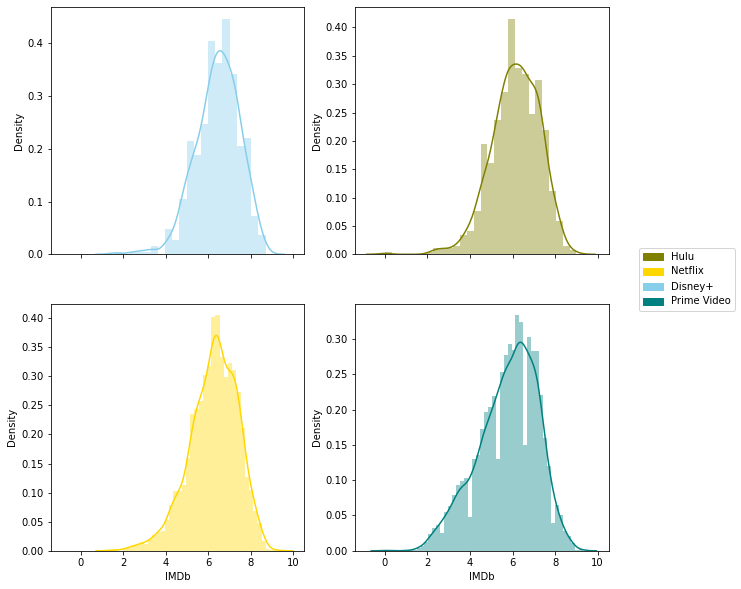

In [13]:
#imdb rating based on different platform


f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot( data_disney["IMDb"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data_Hulu["IMDb"] , color="olive", ax=axes[0, 1])
sns.distplot( data_net["IMDb"] , color="gold", ax=axes[1, 0])
sns.distplot( data_prime["IMDb"] , color="teal", ax=axes[1, 1])

#legend
colors = {'Hulu':'olive', 'Netflix':'gold','Disney+':'skyblue','Prime Video':'teal'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center left', bbox_to_anchor=(1.1, 1.1))

C:\Users\CLICK-USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CLICK-USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CLICK-USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

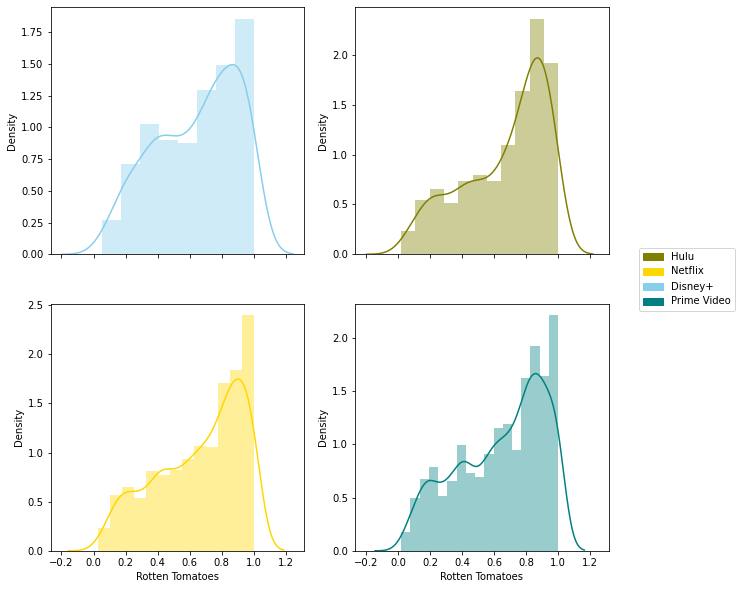

In [14]:
#rotten tomatoes rating based on different platform


f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot( data_disney["Rotten Tomatoes"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data_Hulu["Rotten Tomatoes"] , color="olive", ax=axes[0, 1])
sns.distplot( data_net["Rotten Tomatoes"] , color="gold", ax=axes[1, 0])
sns.distplot( data_prime["Rotten Tomatoes"] , color="teal", ax=axes[1, 1])

#legend
colors = {'Hulu':'olive', 'Netflix':'gold','Disney+':'skyblue','Prime Video':'teal'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc='center left', bbox_to_anchor=(1.1, 1.1))

In [25]:
d = {}

def diction(Type):
    d[Type]=stream_movies[stream_movies['Genres'].str.contains(Type,na=False)]['IMDb'].mean()


diction('Action')
diction('Adventure')
diction('Sci-Fi')
diction('Thriller')
diction('Comedy')
diction('Western')
diction('Animation')
diction('Family')
diction('Biography')
diction('Drama')
diction('Music')
diction('War')
diction('Crime')
diction('Fantasy')
diction('Romance')
diction('History')
diction('Mystery')
diction('Horror')
diction('Sport')
diction('Documentary')
diction('Action')
diction('Short')
diction('Musical')
diction('News')

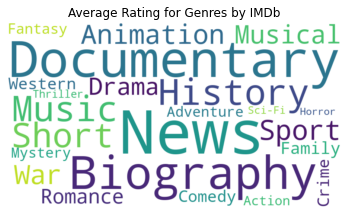

In [26]:
wordcloud = WordCloud(width=900,height=500, max_words=40,background_color="white").generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f'Average Rating for Genres by IMDb')
plt.show()


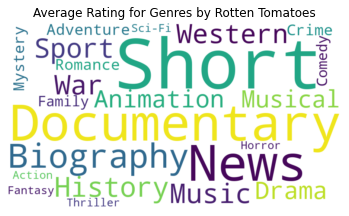

In [27]:
dr = {}

def diction(Type):
    dr[Type]=stream_movies[stream_movies['Genres'].str.contains(Type,na=False)]['Rotten Tomatoes'].mean()


diction('Action')
diction('Adventure')
diction('Sci-Fi')
diction('Thriller')
diction('Comedy')
diction('Western')
diction('Animation')
diction('Family')
diction('Biography')
diction('Drama')
diction('Music')
diction('War')
diction('Crime')
diction('Fantasy')
diction('Romance')
diction('History')
diction('Mystery')
diction('Horror')
diction('Sport')
diction('Documentary')
diction('Action')
diction('Short')
diction('Musical')
diction('News')

wordcloud = WordCloud(width=900,height=500, max_words=40,background_color="white").generate_from_frequencies(dr)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f'Average Rating for Genres by Rotten Tomatoes')
plt.show()

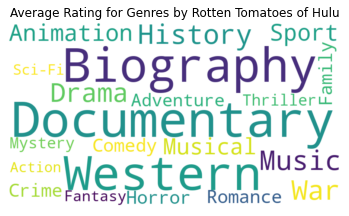

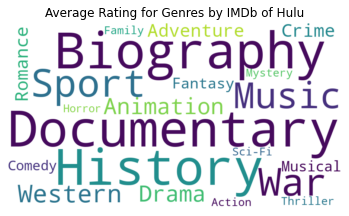

In [28]:
from math import sqrt

def wc(platform,rating):
    dh = {}
    def diction(Type):
        type_count_plf=len(stream_movies[stream_movies['Genres'].str.contains(Type,na=False) &
                    stream_movies[platform]==1])

        type_count =len(stream_movies[stream_movies['Genres'].str.contains(Type,na=False)])
        count_score = type_count_plf*type_count_plf/type_count    
    
        dh[Type]=stream_movies[stream_movies['Genres'].str.contains(Type,na=False) &
                               stream_movies[platform]==1][rating].mean()
        
    diction('Action')
    diction('Adventure')
    diction('Sci-Fi')
    diction('Thriller')
    diction('Comedy')
    diction('Western')
    diction('Animation')
    diction('Family')
    diction('Biography')
    diction('Drama')
    diction('Music')
    diction('War')
    diction('Crime')
    diction('Fantasy')
    diction('Romance')
    diction('History')
    diction('Mystery')
    diction('Horror')
    diction('Sport')
    diction('Documentary')
    #diction('Short')
    diction('Musical')
   # if(platform !='Disney+'):
     #   diction('News')

    wordcloud = WordCloud(width=900,height=500, max_words=40,background_color="white").generate_from_frequencies(dh)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Average Rating for Genres by {rating} of {platform}')
    plt.show() 
    
   
wc('Hulu','Rotten Tomatoes')
wc('Hulu','IMDb')

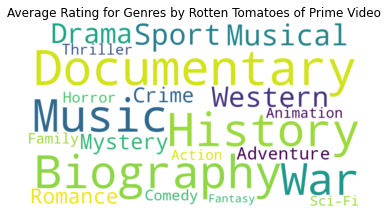

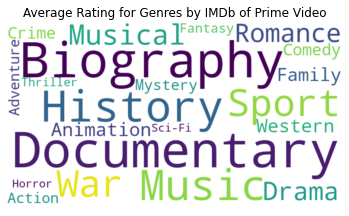

In [29]:
wc('Prime Video','Rotten Tomatoes')
wc('Prime Video','IMDb')

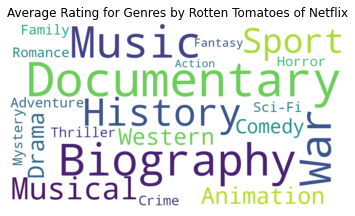

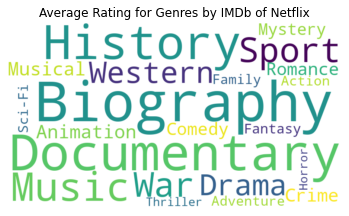

In [30]:
wc('Netflix','Rotten Tomatoes')
wc('Netflix','IMDb')

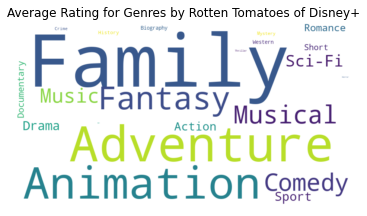

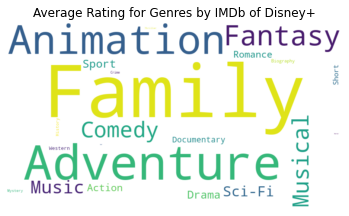

In [343]:
wc('Disney+','Rotten Tomatoes')
wc('Disney+','IMDb')

In [314]:

type_count_plf=len(stream_movies[stream_movies['Genres'].str.contains('Action',na=False) &
                    stream_movies['Netflix']==1])
type_count_plf

545

In [329]:
type_contain=len(stream_movies[stream_movies['Genres'].str.contains('Action',na=False)])

type_contain

2683

0         True
1         True
2         True
3        False
4        False
         ...  
16739    False
16740    False
16741    False
16742    False
16743    False
Name: Genres, Length: 16744, dtype: bool

In [19]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud